In [ ]:
!pip install -q transformers torch pillow

In [ ]:

import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

def caption_image(image_url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(image_url, headers=headers, stream=True)
    response.raw.decode_content = True
    image = Image.open(response.raw).convert('RGB')

    plt.imshow(image)
    plt.show()
    inputs = processor(image, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=50)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

 Cat 



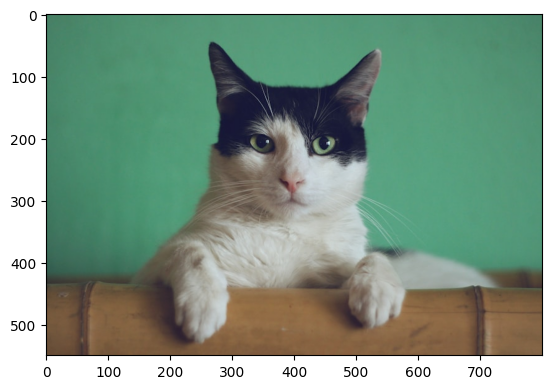

Caption = a black and white cat sitting on top of a wooden box
Dog
 


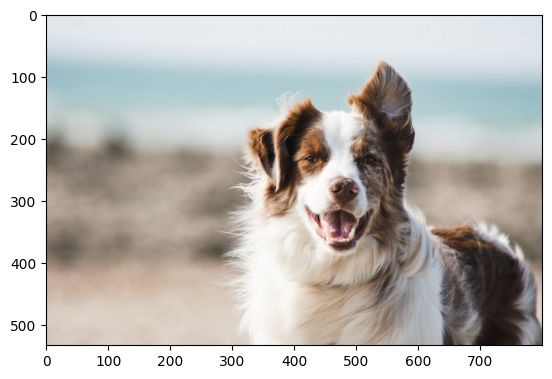

Caption =  a dog standing on a beach looking at the camera
Beach
 


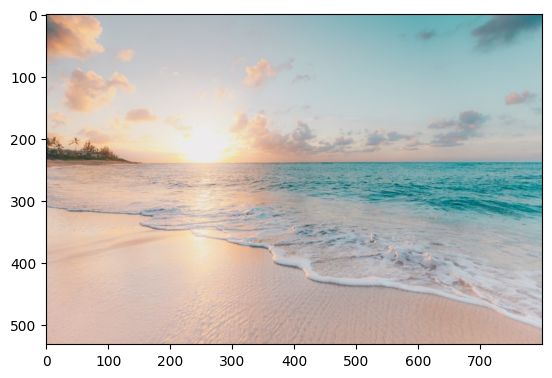

Caption = beautiful sunset on the beach in the caribbean


In [ ]:
print(" Cat \n")
cat_url = "https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?w=800"
caption1 = caption_image(cat_url)
print(f"Caption = {caption1}")

print("Dog\n ")
dog_url = "https://images.unsplash.com/photo-1587300003388-59208cc962cb?w=800"
caption2 = caption_image(dog_url)
print(f"Caption =  {caption2}")

print("Beach\n ")
beach_url = "https://images.unsplash.com/photo-1507525428034-b723cf961d3e?w=800"
caption3 = caption_image(beach_url)
print(f"Caption = {caption3}")